In [168]:
import cmath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [169]:
def FFT(a):
    n = len(a)
    if n==1: return a
    ae = a[0::2]
    ao = a[1::2]
    ye = FFT(ae)
    yo = FFT(ao)
    p = [cmath.exp(-2j*cmath.pi*k/n) * yo[k] for k in range(n//2)]
    return [ye[k] + p[k] for k in range(n//2)] + [ye[k] - p[k] for k in range(n//2)]

In [187]:
p = [5.0, 9.0, 4.0, 10.0]
print(FFT(p))

[(28+0j), (0.9999999999999999+1j), (-10+0j), (1-1j)]


In [171]:
q = [5.0, 2.0, 9.0, 9.0]
print(FFT(q))

[(25+0j), (-4+7j), (3+0j), (-3.9999999999999996-7j)]


In [172]:
def IFFT_Helper(a):
    n = len(a)
    if n==1: return a
    ae = a[0::2]
    ao = a[1::2]
    ye = IFFT_Helper(ae)
    yo = IFFT_Helper(ao)
    p = [cmath.exp(2j*cmath.pi*k/n) * yo[k] for k in range(n//2)]
    return [ye[k] + p[k] for k in range(n//2)] + [ye[k] - p[k] for k in range(n//2)]

In [173]:
def IFFT(a):
    n = len(a)
    y = IFFT_Helper(a)
    y = [y[k]/n for k in range(n-1)]
    return y

In [175]:
def FFT_polynomial_mult(A,B):
    n = max(len(A), len(B))
    N = 2*n
    while (len(A) < N):
        A.append(0)
    while (len(B) < N):
        B.append(0)
    _A = FFT(A)
    _B = FFT(B)
    _C = []
    for k in range(N):
        _C.append(_A[k]*_B[k])
    C = IFFT(_C)
    return C

In [176]:
print(FFT_polynomial_mult(p,q))

[(24.999999999999986-1.942890293094024e-15j), (55+3.598637933768527e-15j), (82.99999999999999-3.17186703525594e-15j), (184+7.059503102632976e-15j), (137+1.609823385706477e-15j), (126-3.5067894238324752e-15j), (90.00000000000001+3.504933942643487e-15j)]


In [177]:
fn = "SampleSignal.csv"
data = pd.read_csv("SampleSignal.csv")
y = data.y
t = data.t

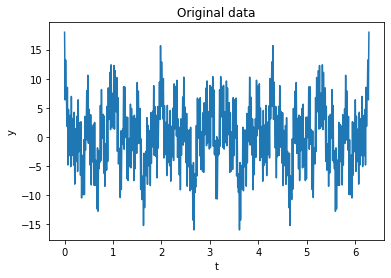

In [178]:
plt.plot(t,y)
plt.ylabel("y")
plt.xlabel("t")
plt.title("Original data")
plt.show()

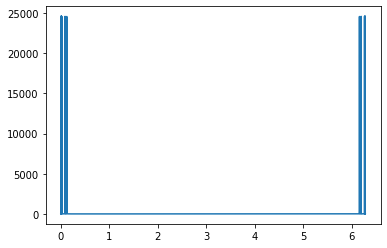

In [179]:
y_list = y.values.tolist()
z = FFT(y_list)
plt.plot(t,np.abs(z))

In [180]:
peaks = find_peaks(np.abs(z))
print(peaks)

(array([    6,    13,    25,    41,   222,   314, 16070, 16162, 16343,
       16359, 16371, 16378], dtype=int64), {})


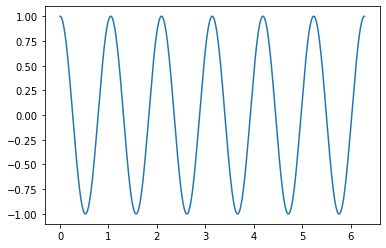

In [185]:
p = []
for i in range(len(peaks[0])):
    p.append(peaks[0][i])
xt = []
for k in range(len(p)):
    xt.append(np.cos(p[k]*t))
plt.plot(t,x[0])